In [ ]:
from PIL import Image

import cv2
import os, glob, numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import array
from PIL import Image as img
from sklearn.model_selection import train_test_split

In [ ]:
data_dir = 'C:/Users/ICT01_09/Documents/CNN'
categories = os.listdir(data_dir)

In [ ]:
categories   # 폴더명

In [ ]:
nb_classes = len(categories)
nb_classes

In [ ]:
#img = cv2.imread("st/st0.jpg")
#print(img.shape)  # 확인 
#title = list(os.listdir("st/"))

#for i, re in enumerate(title):             # 번호 생성 
#    img = cv2.imread("st/{}".format(re))  # st/파일명 을 말한다 
#    resize_img = cv2.resize(img, (64, 64))
#    print("resize_img.shape = {0}".format(resize_img.shape))   
#    cv2.imwrite('styrofoam/st.{}.jpg'.format(i),resize_img)

In [ ]:

#for index in range(len(categories)):
#    path = os.path.join(data_dir, categories[index])
#    path = path + '/'
#    print(path)
#    img_list = os.listdir(path)
#    for img in img_list:
#        img_path = os.path.join(path, img)
#        img = cv2.imread(img_path)
#        img = cv2.resize(img,(64,64))
#        train_input.append([np.array(img)])
#        train_label.append([np.array(onehot_encoder[index])])

In [ ]:
# 이미지 크기 줄여주기 
image_w = 128
image_h = 128


X = []
Y = []

for idex, categorie in enumerate(categories):
    
    #one-hot 돌리기.
    label = [0 for i in range(nb_classes)]
    label[idex] = 1

    image_dir = data_dir + "/" + categorie + '/'
    
    for top, dir, f in os.walk(image_dir):
        for filename in f:
            print(image_dir+filename)
            img = cv2.imread(image_dir+filename)
            img= cv2.resize(img,None,fx=image_w/img.shape[0], fy=image_h/img.shape[1])
            X.append(img/256)
            Y.append(label)
            
X = np.array(X)
Y = np.array(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)
xy = (X_train, X_test, Y_train, Y_test)
np.save("./img_data.npy", xy)

print("ok", len(Y))

In [ ]:
# 1. 데이터 전처리 ( 수작업)

In [ ]:
# 2. 이미지 -> 숫자형 데이터로 변환 
# 필요한 라이브러리 : os, cv2, numpy, sklearn

In [ ]:
import os   # >> 디렉토리 경로 호출
import cv2   # >> 이미지 파일 호출
import numpy as np   # >> 데이터 처리에 사용
from numpy import array  # >> 리스트를 array 형태로 만든다 

In [ ]:
from sklearn.preprocessing import LabelEncoder  #>> 문자로된 폴더리스트를 숫자형 array로 
from sklearn.preprocessing import OneHotEncoder #>> 숫자형 array 를 one-hot-encode 

In [ ]:
data_dir = 'C:/Users/ICT01_09/Documents/train/'  # 이미지 데이터셋의 경로
folder_list = array(os.listdir(data_dir))  # 내부 폴더명을 array 형태로 저장

In [ ]:
print(folder_list)

In [ ]:
X = []  # X값 
Y = []  # label

In [ ]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(folder_list)
# 문자열로 구성된 folder_list 를 숫자형 리스트로 변환
print(integer_encoded)

In [ ]:
onehot_encoder = OneHotEncoder(sparse=False)
# 위에서 부른 OneHotEncoder 함수를 onehot_encoder 라는 변수로 호출
integer_encoded = integer_encoded.reshape(len(integer_encoded),1)
##>> (4.) 에서 (4,1) 로 변한다 

In [ ]:
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)  # integer_encoded 를 변환

In [ ]:
image_w= 128
image_h = 128

for index in range(len(folder_list)): # 0~3까지 4번 반복된다
    path = os.path.join(data_dir, folder_list[index] )
    path = path+'/'
    img_list = os.listdir(path)  # 폴더내 파일명을 저장한다(모든파일명 호출) 
    for img in img_list:
        img_path = os.path.join(path,img)  # img_path : 정확한 이미지 경로
        
        
        
        

# 여기서부터 보기

### 1. 데이터 전처리 ( 수작업)

### 2. 이미지 이름 바꾸기 

In [ ]:
#공부하기

### 3. 이미지 부풀리기 

In [ ]:
# https://tykimos.github.io/2017/06/10/CNN_Data_Augmentation/

In [ ]:
# 폴더별 원래 데이터 갯수를 확인해보자  
import os, glob, numpy as np
from numpy import array
data_dir = "C:/Users/ICT01_09/Documents/train/" # 폴더
categories = array(os.listdir(data_dir))

for idx, trash in enumerate(categories):  
    image_dir = data_dir + '/' + trash   # 4개 폴더 주소 출력 
    files = glob.glob(image_dir+"/*.jpg")
    print(trash, " 파일 길이 : ", len(files))

In [ ]:
# 이미지 데이터를 부풀리자!! 

In [ ]:
import numpy as np
# 랜덤시드 고정시키기
np.random.seed(5)
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=15,  # 원본이미지 회전
                                   width_shift_range=0.1, # 수평방향이동
                                   height_shift_range=0.1, # 수직방향 이동
                                   shear_range=0.5,           #시계반대방향변형
                                   zoom_range=[0.8, 2.0],  # 확대, 축소
                                   horizontal_flip=True, # 수평방향 뒤집기
                                   vertical_flip=True, # 수직방향 뒤집기 
                                   fill_mode='nearest')

In [ ]:
#먼저 can 의 이미지 늘리기 (507-> 10000)
for idx, trash in enumerate(categories):  
    image_dir = data_dir + '/' + trash    # 4개 폴더 주소 출력 
    files = glob.glob(image_dir+"/*.jpg") # 모든 사진 이름 출력
    if trash == 'can':                     # can 폴더 사진만 가져온다 
        for i in range(len(files)):
            img = load_img(files[i])  # 모든 can 의 이미지를 불러왔다 
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i=0
            for batch in train_datagen.flow(x,batch_size=1, save_to_dir = 'C:/Users/ICT01_09/Documents/train/new_can'
                                            ,save_prefix = 'tri', save_format='jpg'):
                i += 1
                if i > 250:  # 200 이면 9999
                    break


image_dir = data_dir + '/' + 'new_can'   # 4개 폴더 주소 출력 
files = glob.glob(image_dir+"/*.jpg")
print(" 파일 길이 : ", len(files))

In [ ]:
#먼저 glass의 이미지 늘리기 (1266-> 10000)
for idx, trash in enumerate(categories):  
    image_dir = data_dir + '/' + trash    # 4개 폴더 주소 출력 
    files = glob.glob(image_dir+"/*.jpg") # 모든 사진 이름 출력
    if trash == 'glass':                     # glass 폴더 사진만 가져온다 
        for i in range(len(files)):
            img = load_img(files[i])  # 모든 glass 의 이미지를 불러왔다 
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i=0
            for batch in train_datagen.flow(x,batch_size=1, save_to_dir = 'C:/Users/ICT01_09/Documents/train/new_glass'
                                            ,save_prefix = 'tri', save_format='jpg'):
                i += 1
                if i > 100:
                    break


image_dir = data_dir + '/' + 'new_glass'   # 4개 폴더 주소 출력 
files = glob.glob(image_dir+"/*.jpg")
print(" 파일 길이 : ", len(files))

In [ ]:
#먼저 pet 의 이미지 늘리기 (-> 10000)
for idx, trash in enumerate(categories):  
    image_dir = data_dir + '/' + trash    # 4개 폴더 주소 출력 
    files = glob.glob(image_dir+"/*.jpg") # 모든 사진 이름 출력
    if trash == 'pet':                     # can 폴더 사진만 가져온다 
        for i in range(len(files)):
            img = load_img(files[i])  # 모든 can 의 이미지를 불러왔다 
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i=0
            for batch in train_datagen.flow(x,batch_size=1, save_to_dir = 'C:/Users/ICT01_09/Documents/train/new_pet'
                                            ,save_prefix = 'tri', save_format='jpg'):
                i += 1
                if i > 200:
                    break


image_dir = data_dir + '/' + 'new_pet'   # 4개 폴더 주소 출력 
files = glob.glob(image_dir+"/*.jpg")
print(" 파일 길이 : ", len(files))

In [ ]:
#먼저 styrofoam 의 이미지 늘리기 (451-> 10000)
for idx, trash in enumerate(categories):  
    image_dir = data_dir + '/' + trash    # 4개 폴더 주소 출력 
    files = glob.glob(image_dir+"/*.jpg") # 모든 사진 이름 출력
    if trash == 'styrofoam':                     # can 폴더 사진만 가져온다 
        for i in range(len(files)):
            img = load_img(files[i])  # 모든 can 의 이미지를 불러왔다 
            x = img_to_array(img)
            x = x.reshape((1,) + x.shape)
            i=0
            for batch in train_datagen.flow(x,batch_size=1, save_to_dir = 'C:/Users/ICT01_09/Documents/train/new_styrofoam'
                                            ,save_prefix = 'tri', save_format='jpg'):
                i += 1
                if i > 200:
                    break


image_dir = data_dir + '/' + 'new_styrofoam'   # 4개 폴더 주소 출력 
files = glob.glob(image_dir+"/*.jpg")
print(" 파일 길이 : ", len(files))

### 3.  이미지 배열화 

In [1]:
from PIL import Image
import os, glob, numpy as np
from sklearn.model_selection import train_test_split
import numpy as np   # >> 데이터 처리에 사용
from numpy import array

data_dir = "C:/Users/ICT01_09/Documents/train/" # 폴더

#categories = array(os.listdir(data_dir)) # 각 카테고리 폴더에서 불러오기
categories = ['new_can', 'new_pet', 'new_glass', 'new_styrofoam']
print(categories)
nb_classes = len(categories)
print(nb_classes)

['new_can', 'new_pet', 'new_glass', 'new_styrofoam']
4


In [2]:
image_w = 64; image_h = 64  # 이미지 크기 : 64x64 
X = []
Y = []

In [3]:
for idx, trash in enumerate(categories):     #>>idx=0,1,2,3 생성/ trash 는 폴더이름 
    label = [0 for i in range(nb_classes)]   # label 을 0으로 초기화->[0,0,0,0]
    label[idx]=1  
      #[1, 0, 0, 0] 
      #[0, 1, 0, 0]
      #[0, 0, 1, 0]
      #[0, 0, 0, 1]
    image_dir = data_dir + '/' + trash   # 4개 폴더 주소 출력 
    files = glob.glob(image_dir+"/*.jpg") # 모든 사진 주소 가져온다 
    
    for i, f in enumerate(files): #그룹별 사진파일마다 0부터 숫자부여(i는 숫자, f는 주소)
        img = Image.open(f) # 이미지 하나하나 불러온다고 생각하자 
        img = img.convert('RGB')  # 그레이로 하겠다
        img = img.resize((image_w, image_h)) #사이즈 다시 설정
        data = np.asarray(img)  # img 값을 넘파이 라이브러리 이용해 가지고와서 저장한다
        
        X.append(data)  # X data
        Y.append(label) # Y 는 리스트형으로 저장 
        
        
        #if i % 3500 == 0: # 1500번째 사진을 가져온다 ( 확인용 ) 
         #   print(trash,":",f)

X = np.array(X)
Y = np.array(Y)

## Y 는 아래처럼 저장이 된다 
## can 이면 [1,0,0,0]
## glass이면  [0,1,1,1] 

In [ ]:
# print(len(Y))

### 4. 이미지 (훈련데이터/ 테스트 데이터 나누기)

In [4]:
X_train, X_test, y_train,y_test = train_test_split(X,Y)
print(len(X))
print(len(Y))
print(len(X_train))
print(len(X_test))

40000
40000
30000
10000


In [6]:
xy=(X_train,X_test,y_train,y_test)
np.save("./multi_image_data.npy",xy)  ## numpy 라이브러리 이용해서 외부파일로 저장한다
                                     # 배열을 저장함

In [ ]:
#x_save_load = np.load('./multi_image_data.npy')
#x_save_load  # 배열 부른것 저장

### 5. 메모리 절약

In [7]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
import tensorflow as tf

# 메모리 절약하기 
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allocator_type = 'BFC'
config.gpu_options.per_process_gpu_memory_fraction = 0.90
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

X_train, X_test, y_train, y_test = np.load('./multi_image_data.npy',allow_pickle=True)


Using TensorFlow backend.


In [8]:
print(X_train.shape)
print(X_train.shape[0])
print(X_test.shape)
print(y_train[:10])

(30000, 64, 64, 3)
30000
(10000, 64, 64, 3)
[[0 0 1 0]
 [0 0 1 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 1 0]]


### 6. 정규화

In [9]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/ 255

In [10]:
tf.reset_default_graph()

### 7. 모델링


#### 모델1 : 컨볼루션층2개

In [11]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K

import tensorflow as tf

In [12]:
with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64, (3,3), padding="same", activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Flatten())  # flatten 시킨다 
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # 오차함수는 categorical_crossentropy 를 사용하고
    # 최적화함수는 adam 을 사용한다
    # metrics -> 평가기준을 말한다 (학습과정중 제대로학습하는지) ,일반적으로 accuracy 를 삽입한다 )
    # --> 내부적으로 categorical_accuracy 함수를 이용하여 정확도 계산이 가능하다 
    
    
    
    # 모델의 성과를 저장하고, 모델의 최적화단계에서 학습을 자동중단하게 설정
    #--> 10회 이상 모델의 성과 향상이 없으면 자동으로 학습이 중단된다 
    model_dir = 'C:/Users/ICT01_09/Documents/model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)   # 과적합된다는 신호가 오는데 6번정도오면 끊는다 

In [43]:
#<학습 조기종료시키기>
# https://tykimos.github.io/2017/07/09/Early_Stopping/
# 과적합을 방지하기 위해 조기 종료한다 
#>> EarlyStopping 이라는 함수를 사용하여, 더 이상의 개선의 여지가 없을때 학습 종료
#>> fit 함수에서 Earlystopping 이라는 콜백함수를 설정하면 된다 

#checkpoint 를 확인해보자 
#monitor='val_loss' ( 관찰하고자 하는 항목 ) 
#verbose : 얼마나 자세하게 정보를 표현할 것인가 ( 0,1,2)

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)            

In [15]:
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_split=0.2, callbacks=[checkpoint, early_stopping])


Train on 24000 samples, validate on 6000 samples
Epoch 1/50
24000/24000 [==============================] - 70s 3ms/step - loss: 0.8621 - accuracy: 0.6277 - val_loss: 0.6638 - val_accuracy: 0.7195

Epoch 00001: val_loss improved from inf to 0.66382, saving model to C:/Users/ICT01_09/Documents/model/multi_img_classification.model
Epoch 2/50
24000/24000 [==============================] - 68s 3ms/step - loss: 0.6100 - accuracy: 0.7393 - val_loss: 0.5485 - val_accuracy: 0.7810

Epoch 00002: val_loss improved from 0.66382 to 0.54852, saving model to C:/Users/ICT01_09/Documents/model/multi_img_classification.model
Epoch 3/50
24000/24000 [==============================] - 72s 3ms/step - loss: 0.5036 - accuracy: 0.7931 - val_loss: 0.5129 - val_accuracy: 0.7763

Epoch 00003: val_loss improved from 0.54852 to 0.51285, saving model to C:/Users/ICT01_09/Documents/model/multi_img_classification.model
Epoch 4/50
24000/24000 [==============================] - 70s 3ms/step - loss: 0.4255 - accuracy: 0

In [ ]:
# fit 함수의 결과
# loss(에포크마다 훈련 손실값), acc(에포크마다 훈련 정확도),
# val_loss(에포크마다 검증 손실값), val_acc(에포크마다 검증 정확도) 

In [37]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 8s 810us/step


[0.22883072189688683, 0.9395999908447266]

In [39]:
print("정확도 : %.4f" % (model.evaluate(X_test, y_test)[1]))

10000/10000 [==============================] - 8s 770us/step
정확도 : 0.9396


In [ ]:
# 모델학습 과정 표시하기 

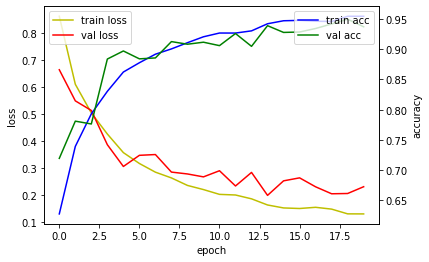

In [45]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()  # x축은 에포크수, y 축은 손실값 
acc_ax = loss_ax.twinx()   

loss_ax.plot(history.history['loss'], 'y', label='train loss') # 훈련 손실값 (노란색)
loss_ax.plot(history.history['val_loss'], 'r', label='val loss') #검증(val=validation) 손실값( 빨간색)
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'b', label='train acc') #훈련 정확도 ( 파란색)
acc_ax.plot(history.history['val_accuracy'], 'g', label='val acc')# 검증정확도(녹색) 
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

In [ ]:
# epoch =50 이였는데, 20에서 멈춤 ( 자기딴에는 과적합이라고 생각해서 )
# epochs 값이 지나치게 클 수록 과적합이 발생할 수 있다 

In [ ]:
# 손실값 작을수록 좁다 . 손실값을 최소화하도록 optimizer 을 쓴다
# https://tykimos.github.io/2017/07/09/Training_Monitoring/

In [ ]:
# 실제 그림을 넣고 예측해보자 

In [72]:
from PIL import Image
import os, glob, numpy as np
from keras.models import load_model

In [73]:
test_dir = "C:/Users/ICT01_09/Documents/train/other_test"
image_w = 64
image_h = 64

In [74]:
X = []
filenames = []
files = glob.glob(test_dir+"/*.*") # 모든 파일이 출력된다 

In [75]:
for i, f in enumerate(files):  
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data = np.asarray(img)
    filenames.append(f)
    
    X.append(data)

X= np.array(X)
model = load_model("./model/multi_img_classification.model")

In [76]:
prediction = model.predict(X)

In [80]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
cnt = 0
for i in prediction:
    pre_ans = i.argmax()  # 예측 레이블
    #print(i)
    #print(pre_ans)
    pre_ans_str = ''
    if pre_ans == 0: pre_ans_str = "캔"
    elif pre_ans == 1: pre_ans_str = "플라스틱"
    elif pre_ans == 2: pre_ans_str = "유리"
    else: pre_ans_str = "스티로품"
    if i[0] >= 0.8 : print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[1] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"으로 추정됩니다.")
    if i[2] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    if i[3] >= 0.8: print("해당 "+filenames[cnt].split("\\")[1]+"이미지는 "+pre_ans_str+"로 추정됩니다.")
    cnt += 1

해당 imag3.jpg이미지는 유리로 추정됩니다.
해당 image1.jpg이미지는 캔로 추정됩니다.
해당 image2.jpg이미지는 유리로 추정됩니다.
해당 image4.jpg이미지는 캔로 추정됩니다.
해당 image5.jpg이미지는 유리로 추정됩니다.
해당 images.jpg이미지는 캔로 추정됩니다.


In [ ]:
# 모델링2

In [46]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=X_train.shape[1:],padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(nb_classes, activation='softmax'))

In [ ]:
 optimizer='adam'

In [47]:
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

NameError: name 'optimizers' is not defined

In [ ]:
model.fit(X_train,y_train,epochs=30,batch_size=32, epochs=50,validation_split=0.2,
         callbacks)

In [ ]:
#모델링1 : 간단한 컨브넷 만들기( conv2d, maxpooling2d 층을 쌓아올렸다) 

In [ ]:
from keras import layers
from keras import models

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), input_shape=(64,64,3), activation='relu'))
# -> input 으로 64x64x3 이 들어간다.(input height, input width, input channel=색)  
# -> 3x3 크기의 필터 32개를 사용한다.
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))

In [ ]:
 model.summary()

In [ ]:
# Conv2d, Maxpooling2D 의 출력은 (height, width, channels ) 
# 마지막 층의 (12,12,64) 를 완전 연결층에 주입한다 ( flatten 시켜서 3d 출력을 1d 텐서로 만든다 ) 

In [ ]:
model.add(layers.Flatten())

In [ ]:
model.add(layers.Dense(128,activation='relu'))

model.add(layers.Dense(4, activation='softmax')) # 4개의 클래스로 분류해보기 위해 마지막 층의 출력 크기를 4로 한다.

In [ ]:
 model.summary() #>> (12,12,64) 가 (9216,) 크기의 벡터로 펼쳐진후 dense 층에 주입되었음 

In [ ]:
##훈련+ 평가

In [ ]:
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = np.load('./multi_image_data.npy',allow_pickle=True)
print(X_train.shape)
print(X_train.shape[0])
print(X_test.shape)
#print(y_train[:10])

In [ ]:
X_train = X_train.astype('float32')/255 
X_test = X_test.astype('float32')/ 255

In [ ]:
#X_train = tf.reshape(X_train,[-1,64,64,1])

#X_test = tf.reshape(X_test,[-1,64,64,1])


In [ ]:
print(X_train.shape)

In [ ]:
y_train = to_categorical(y_train,4) # 활성화함수를 적용하기 위해 원핫인코딩한다고 생각하면 될듯 
y_test = to_categorical(y_test,4)
#print(y_train)

In [ ]:
#신경망의 성능을 개선하기 위해 하는 것
#https://datascienceschool.net/view-notebook/f18248a467e94c6483783afc93d08af9/
# https://tykimos.github.io/2017/09/24/Custom_Metric/

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

#1.  RMSprop 옵티마이저 사용
#2.  loss인수를 설정하여 크로스 엔트로피 사용
#3.  metrics -> 평가기준을 말한다 (학습과정중 제대로학습하는지) ,일반적으로 accuracy 를 삽입한다 )
#   --> 내부적으로 categorical_accuracy 함수를 이용하여 정확도 계싼이 가능하다 

In [ ]:
model.fit(X_train,y_train,epochs=5, batch_size=64)

In [ ]:
model.fit(X_train[:,:,-1],y_train[:,:,-1], steps_per_epoch=5,epochs=5)

In [ ]:
model = Sequential() 
model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
# 3x3 크기의 필터 32개 사용 , 활성화 함수는 relu 를 사용 ( input 으로는 64x64x3 이들어감)
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 완전연결층 
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes,activation='softmax'))

In [ ]:
model.summary()

In [ ]:
print('정확도 : %.4f' % (model.evaluate(X_test, y_test)[1]))

In [ ]:
with K.tf_ops.device('/device:GPU:0'): # 디바이스 현재 GPU 없이 CPU로 구동중
    model = Sequential() 
    model.add(Conv2D(32, (3,3), padding="same", input_shape=X_train.shape[1:], activation='relu'))
    # 3x3 크기의 필터 32개 사용 , 활성화 함수는 relu 를 사용 ( input 으로는 64x64x3 이들어감)
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    
    # 완전연결층 
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes,activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model_dir = './model'
    
    if not os.path.exists(model_dir):
        os.mkdir(model_dir)
    
    model_path = model_dir + '/multi_img_classification.model'
    checkpoint = ModelCheckpoint(filepath=model_path , monitor='val_loss', verbose=1, save_best_only=True)
    early_stopping = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
model.summary()

In [ ]:
model2= model
model2.summary()

In [ ]:
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.utils import to_categorical
def compile_and_train(model, num_epochs):
    model.compile(loss = categorical_crossentropy, optimizer=Adam(), metrics=['acc'])
    history= model.fit(x=X_train, y=y_train, batch_size=32, epochs=num_epochs, verbose=1,
                       validation_split =0.2) 

    
_ = compile_and_train(model2, num_epochs=20)

In [ ]:
print("정확도 : %.4f" % (model2.evaluate(X_test, y_test)[1]))

def evaluate_error(model):
    pred = model.predict(X_test, batch_size=32)
    pred = np.argmax(pred, axis=1)
    pred = np.expand_dims(pred, axis=1) # make same shape as y_test
    error = np.sum(np.not_equal(pred, y_test))/ y_test.shape[0]
    return error



evaluate_error(model2)

In [ ]:
(맨 앞부분에서 해보기)
# generator -> 사진크기 늘리기 ( )
# 정규화